### Домашнее задание №1 к лекции «Базовые понятия статистики»

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

#### Задание 1
Загрузка данных
Изучить представленный набор данных на основе описания его столбцов, загрузить его и оставить 8 столбцов для дальнейшего изучения: __surgery?, age, rectal temperature, pulse, respiratory rate, temperature of extremities, pain, outcome.__

| название | русское название | допустимые значения | тип |
|--------- | ---------- |--------- | ---------- |
| surgery?| была ли операция | 1 да<br>2 нет | качественный |
| age| возраст | любой<br>адекватный| количественный дискретный |
| rectal temperature| температура в попе | 37.8 норм | количественный непрерывный |
| pulse| пульс | 30-40 | количественный дискретный |
| respiratory rate| частота дыхания | 8-10 | количественный дискретный |
| temperature of extremities| температура конечностей | 1 норм<br>2 горячие<br>3 прохладны<br>4 холодные | качественный |
| pain| боль |1 боли нет<br>2 депрессия<br>3 редкая легкая боль<br>4 редкая сильная боль<br>5 постоянная сильная боль | качественный |
| outcome| причина списания  | 1 жив<br>2 умер<br>3 усыплен | качественный |

In [2]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv',
    header=None,
    usecols=[0, 1, 3, 4, 5, 6, 10, 22],
    names=['surgery',
           'age',
           'rectal_temperature',
           'pulse',
           'respiratory_rate',
           'temperature_of_extremities',
           'pain',
           'outcome'], 
    na_values='?')

In [3]:
df.head()

,surgery,age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     299 non-null    float64
 1   age                         300 non-null    int64  
 2   rectal_temperature          240 non-null    float64
 3   pulse                       276 non-null    float64
 4   respiratory_rate            242 non-null    float64
 5   temperature_of_extremities  244 non-null    float64
 6   pain                        245 non-null    float64
 7   outcome                     299 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


- В таблице 300 строк. 
- Кроме `age` во всех столбцах есть пропуски.  
- Все столбцы и качественные и количественные дискретные представлены как `float64`, только __age__ `int`. Это потому что `int` не может быть пустым. 
- Приводить все качественные и количественные дискретные к `int` пока не будем, это все равно ни к чему не приведет.
- Качественные столбцы приводить к `object` тоже пока рано, этот тип сложен в обработке.

#### Задание 2  
Первичное изучение данных  
Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.

По качественным столбцам выводить статистики смысла мало. Выведем только по количественным, но добавим 5 и 95 персентили

In [5]:
def print_stat(df):
    col_list = ['age', 'rectal_temperature', 'pulse', 'respiratory_rate']
    # col_list = df.columns
    stat = df[col_list].describe(percentiles=[.05, .25, .5, .75, .95]).T
    display(stat)

    plt.figure(figsize=(18,5))
    sns.boxplot(data=df[col_list], 
                orient='h', showfliers=True, showmeans=True,
                meanprops={'marker':'o', 
                           'markerfacecolor':'white', # Добавим белую точку - среднюю
                           'markeredgecolor':'black', 
                           'markersize':'10'})
    plt.title('Боксплоты по количественным признакам')
    plt.xlabel('Значения наблюдений')
    plt.ylabel('')
    plt.show()

,count,mean,std,min,5%,25%,50%,75%,95%,max
age,300.0,1.640000,2.173972,1.0,1.0,1.0,1.0,1.0,9.0,9.0
rectal_temperature,240.0,38.167917,0.732289,35.4,37.1,37.8,38.2,38.5,39.4,40.8
pulse,276.0,71.913043,28.630557,30.0,40.0,48.0,64.0,88.0,125.0,184.0
respiratory_rate,242.0,30.417355,17.642231,8.0,12.0,18.5,24.5,36.0,69.9,96.0


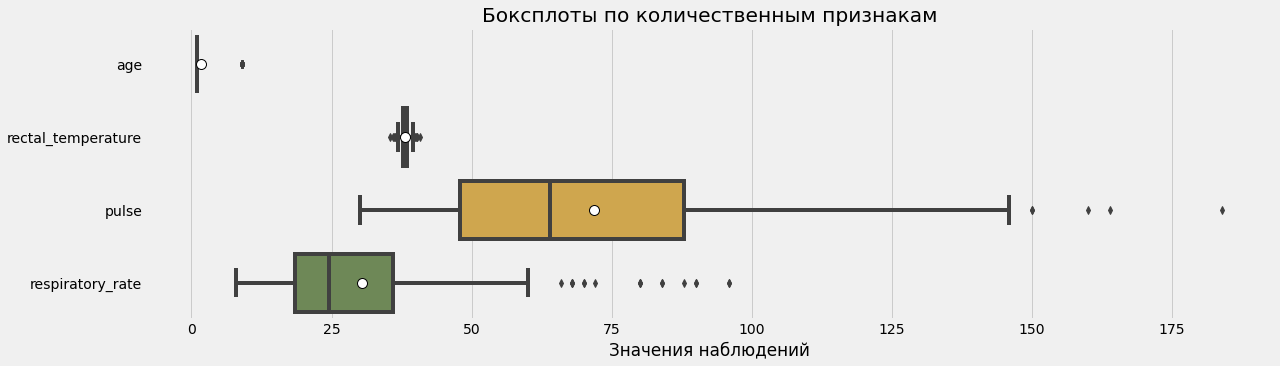

In [6]:
print_stat(df)

В таблице пока выделяется выброс в возрасте - 9-летние лошади, по остальным надо присматриваться.  
Для наглядности выводим ящики с усами по количественным столбцам

В итоге:
- В столбце __age__ таки выброс - 9. 
- В столбце __rectal_temperature__ размах крайне мал, поэтому и выбросы не так очевидны, и "прижаты" к центру. Температура обычно распределена нормально, следовательно выбросы двусторонние.
- В столбце __pulse__ 4 выброса в большую сторону. На графике они смещают среднюю от медианы влево
- В столбце __respiratory_rate__ выбросы тоже есть в большую сторону.
-----
Выведем уникальные значения выбросов по каждому количественному столбцу

In [7]:
iqr = df.quantile(.75) - df.quantile(.25)
low, high = df.quantile(.25) - 1.5 * iqr, df.quantile(.75) + 1.5 * iqr
print('-'*85)

for i in df.columns:
    print(i,'-', *set(df.loc[(df[i] < low[i]) | (df[i] > high[i])][i]))

-------------------------------------------------------------------------------------
surgery -
age - 9
rectal_temperature - 35.4 36.4 36.5 36.0 39.7 40.3 39.9 39.6 36.1 36.6 40.8 40.0
pulse - 160.0 164.0 150.0 184.0
respiratory_rate - 96.0 66.0 68.0 70.0 72.0 80.0 84.0 88.0 90.0
temperature_of_extremities -
pain -
outcome -


#### Задание 3. Работа с пропусками   
Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них. Сформировать датафрейм, в котором пропуски будут отсутствовать.

In [8]:
def print_missing_data(df):
    df.info()
    plt.figure(figsize=(9, 4))
    colours = ['#000099', '#ffff00'] 
    sns.heatmap(df[df.columns].isnull().T, cmap=sns.color_palette(colours), cbar=False)
    plt.show()

In [9]:
pd.concat([
    df.isna().sum().rename('cnt'), 
    (df.isna().sum() / df.isna().count() * 100).rename('%')], 
    axis=1)

,cnt,%
surgery,1,0.333333
age,0,0.000000
rectal_temperature,60,20.000000
pulse,24,8.000000
respiratory_rate,58,19.333333
temperature_of_extremities,56,18.666667
pain,55,18.333333
outcome,1,0.333333


Из всех столбцов __age__ самый заполненный. В __surgery__ и __outcome__ по одному пропуску. Возможно это одна и та же лошадь. Среди остальных столбцов наименее пострадавший это __pulse__. Заполним пропуски медианой, чтобы выбросы не смещали среднее значение

In [10]:
df['pulse'] = df['pulse'].fillna(int(df['pulse'].median())) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     299 non-null    float64
 1   age                         300 non-null    int64  
 2   rectal_temperature          240 non-null    float64
 3   pulse                       300 non-null    float64
 4   respiratory_rate            242 non-null    float64
 5   temperature_of_extremities  244 non-null    float64
 6   pain                        245 non-null    float64
 7   outcome                     299 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


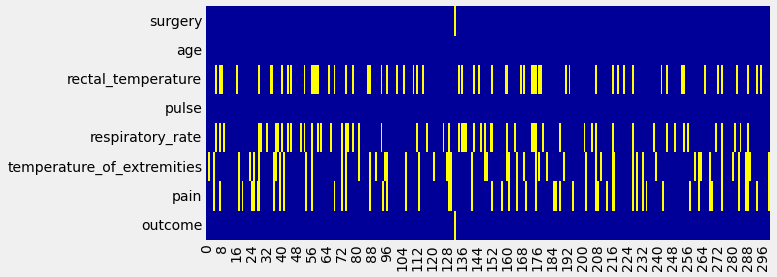

In [11]:
print_missing_data(df)

In [12]:
df.loc[df['rectal_temperature'].isnull(), 
       'rectal_temperature'] = df.groupby('pulse')['rectal_temperature'].transform('mean')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     299 non-null    float64
 1   age                         300 non-null    int64  
 2   rectal_temperature          298 non-null    float64
 3   pulse                       300 non-null    float64
 4   respiratory_rate            242 non-null    float64
 5   temperature_of_extremities  244 non-null    float64
 6   pain                        245 non-null    float64
 7   outcome                     299 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


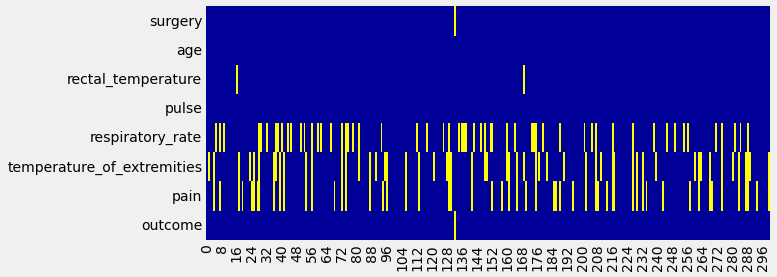

In [13]:
print_missing_data(df)

In [14]:
df.dropna(subset=['surgery', 'outcome', 'rectal_temperature'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     297 non-null    float64
 1   age                         297 non-null    int64  
 2   rectal_temperature          297 non-null    float64
 3   pulse                       297 non-null    float64
 4   respiratory_rate            239 non-null    float64
 5   temperature_of_extremities  242 non-null    float64
 6   pain                        242 non-null    float64
 7   outcome                     297 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 20.9 KB


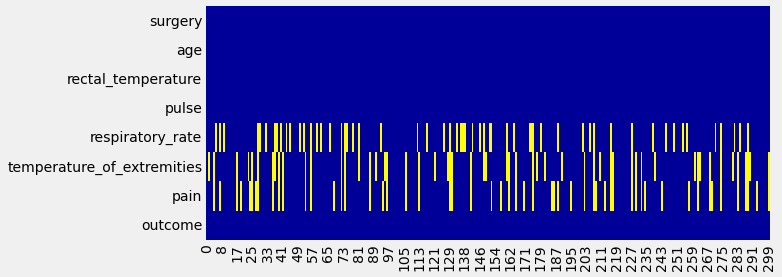

In [15]:
print_missing_data(df)

In [16]:
df.loc[df['temperature_of_extremities'].isna(), 
       'temperature_of_extremities'] = df.groupby('pulse')['temperature_of_extremities'].transform('median')
df.loc[df['pain'].isna(), 
       'pain'] = df.groupby('pulse')['pain'].transform(lambda x: x.mode().max())
df.loc[df['respiratory_rate'].isna(), 
       'respiratory_rate'] = df.groupby('pulse')['respiratory_rate'].transform(lambda x: x.mode().max())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     297 non-null    float64
 1   age                         297 non-null    int64  
 2   rectal_temperature          297 non-null    float64
 3   pulse                       297 non-null    float64
 4   respiratory_rate            294 non-null    float64
 5   temperature_of_extremities  291 non-null    float64
 6   pain                        292 non-null    float64
 7   outcome                     297 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 29.0 KB


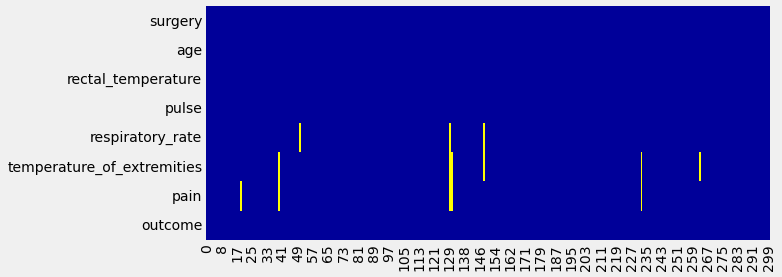

In [17]:
print_missing_data(df)

In [18]:
df.dropna(inplace=True)

In [19]:
for i in ['surgery','age', 'pulse', 'respiratory_rate','temperature_of_extremities', 'pain', 'outcome']:
    df[i] = df[i].astype("int")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     289 non-null    int64  
 1   age                         289 non-null    int64  
 2   rectal_temperature          289 non-null    float64
 3   pulse                       289 non-null    int64  
 4   respiratory_rate            289 non-null    int64  
 5   temperature_of_extremities  289 non-null    int64  
 6   pain                        289 non-null    int64  
 7   outcome                     289 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 20.3 KB


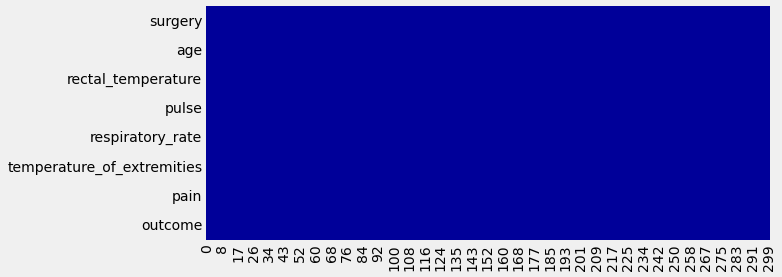

In [20]:
print_missing_data(df)

,count,mean,std,min,5%,25%,50%,75%,95%,max
age,289.0,1.608997,2.125259,1.0,1.0,1.0,1.0,1.0,9.0,9.0
rectal_temperature,289.0,38.204360,0.675990,35.4,37.2,37.9,38.2,38.6,39.3,40.8
pulse,289.0,71.020761,26.852082,36.0,40.0,50.0,64.0,88.0,120.0,184.0
respiratory_rate,289.0,30.200692,16.697093,8.0,12.0,20.0,24.0,36.0,69.2,96.0


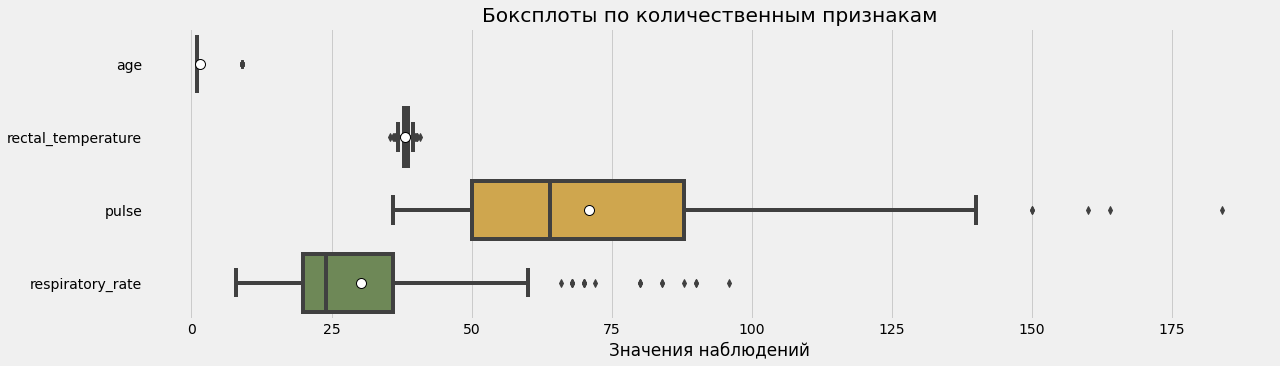

In [21]:
col_list = ['age', 'rectal_temperature', 'pulse', 'respiratory_rate']
# col_list = df.columns
stat = df[col_list].describe(percentiles=[.05, .25, .5, .75, .95]).T
display(stat)

plt.figure(figsize=(18,5))
sns.boxplot(data=df[col_list], 
            orient='h', showfliers=True, showmeans=True,
            meanprops={'marker':'o', 
                       'markerfacecolor':'white', # Добавим белую точку - среднюю
                       'markeredgecolor':'black', 
                       'markersize':'10'})
plt.title('Боксплоты по количественным признакам')
plt.xlabel('Значения наблюдений')
plt.ylabel('')
plt.show()